In [48]:
import numpy as np
import time

def hybrid_newton(f, gf, hf, lsearch, x0, eps):
    x = [x0]
    fs = [f(x0)]
    gfx = gf(x0)
    gs = [np.linalg.norm(gfx)]
    hfx = hf(x0)
    start = time.time()
    ts = [0]
    newton = [0]
    d = []
    direction = [0]*2
    i = 0
    while np.linalg.norm(gfx) > eps:
        try:
            np.linalg.cholesky(hfx)
            d.append(-np.linalg.solve(hfx, gfx))
            direction[1] = "newton"
            newton.append(1)
        except np.linalg.LinAlgError:
            d.append(-gfx)
            direction[1] = "grad"
            newton.append(0)
        direction[0] = d[i]

        t = lsearch(x[i], gfx, direction)
        x.append(x[i] + t*d[i])
        i += 1
        fs.append(f(x[i]))
        gfx = gf(x[i])
        gs.append(np.linalg.norm(gfx))
        hfx = hf(x[i])
        ts.append(time.time() - start)
     
        
    return x[-1], fs, gs, ts, newton

In [49]:
def hybrid_back(f, alpha, beta, s):
    def lsearch(x, gfx, direction):
        if direction[1] == "grad":
            t = s
            while f(x) - f(x - t * gfx) < alpha * t * (np.linalg.norm(gfx) ** 2):
                t = beta * t
            return t
        else:
            return 1
    return lsearch

In [50]:
x0 = np.array([200, 0], dtype=np.float64)

f = lambda x: x[0]**4 + x[1]**4 - 36*x[0]*x[1]
gf = lambda x: np.array([4*x[0]**3 - 36*x[1], 4*x[1]**3 - 36*x[0]])
hf = lambda x: np.array([[12*x[0]**2, -36], [-36, 12*x[1]**2]])
lsearch = hybrid_back(f, 0.25, 0.5, 1)
eps = 1e-6
x, fs, gs, ts, newton = hybrid_newton(f, gf, hf, lsearch, x0, eps)

In [51]:
fs_plot = [fsx + 162 for fsx in fs]
for fsx in fs_plot:
    if fsx < 0:
        print(fsx)
print(f(x))

-2.842170943040401e-14
-162.00000000000003


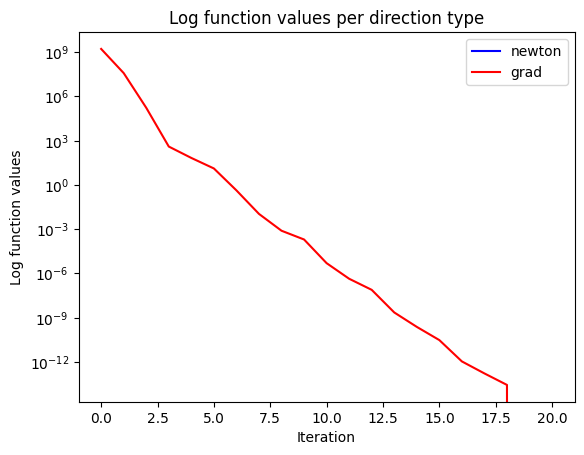

In [60]:
import matplotlib.pyplot as plt

fs_162 = [fsx + 162 for fsx in fs]
fs_162_newt =[]
fs_162_grad= []
iter_newt = []
iter_grad = []
for i in range(len(fs_162)):
    if newton[i] == 1:
        fs_162_newt.append(fs_162[i])
        iter_newt.append(i)
    else:
        fs_162_grad.append(fs_162[i])
        iter_grad.append(i)
plt.semilogy(iter_newt, fs_162_newt, label='newton', color='blue')
plt.semilogy(iter_grad, fs_162_grad, label='grad', color='red')
plt.xlabel('Iteration')
plt.ylabel('Log function values')
plt.title('Log function values per direction type')
plt.legend()
plt.show()